<a href="https://colab.research.google.com/github/Mashael0x/Data-Science-Bootcamp/blob/main/Week11_Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import what you need
import pandas as pd

#### - Your target column is called `target`, this dataset is used for classification.

#### - Use what you have learned over the last two weeks to create a model that correctly predicts whether a mushroom is poisonous or edible.

#### - The data has already been loaded for you

[Data Source](https://archive.ics.uci.edu/ml/datasets/Mushroom)

In [2]:
# Data Dictionary
!curl "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names"

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [3]:
col_names=["target", "cap_shape","cap_surface", "cap_color", "bruises", "odor", "gill-attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface-below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]
mushroom_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=col_names)
print(f"Mushroom Data Shape: {mushroom_data.shape}")
mushroom_data.head()

Mushroom Data Shape: (8124, 23)


,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_data.isnull().sum()

target                      0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill-attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface-below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

**there is a clear relationship between odor and target**

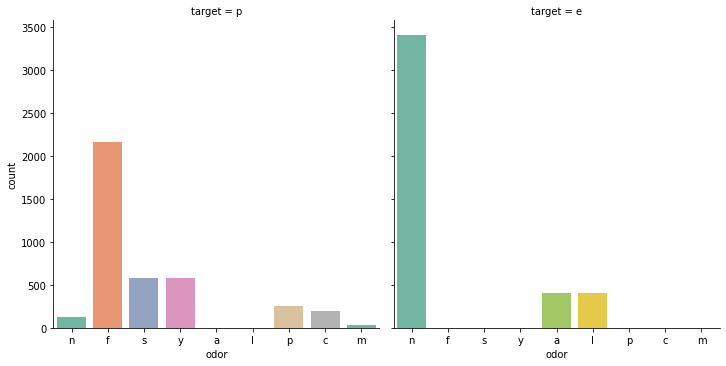

In [5]:
import seaborn as sns

sns.catplot(x= 'odor', col = 'target', kind = 'count', order = mushroom_data['odor'].value_counts().index , data = mushroom_data, palette = 'Set2');

**cap-color is not a strong indicator if mushroom is poisunus or edible**

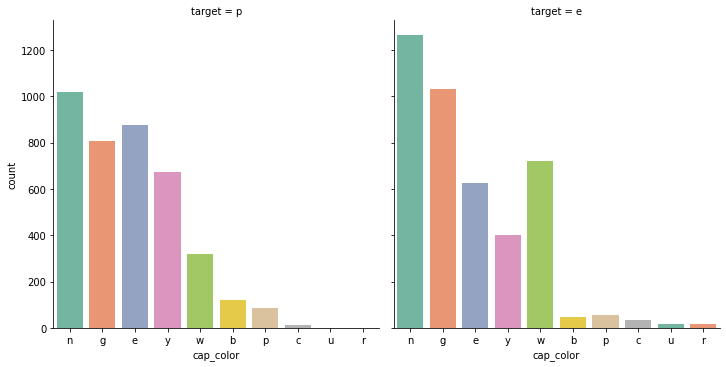

In [6]:
sns.catplot(x= 'cap_color', col = 'target', kind = 'count', order = mushroom_data['cap_color'].value_counts().index , data = mushroom_data, palette = 'Set2');

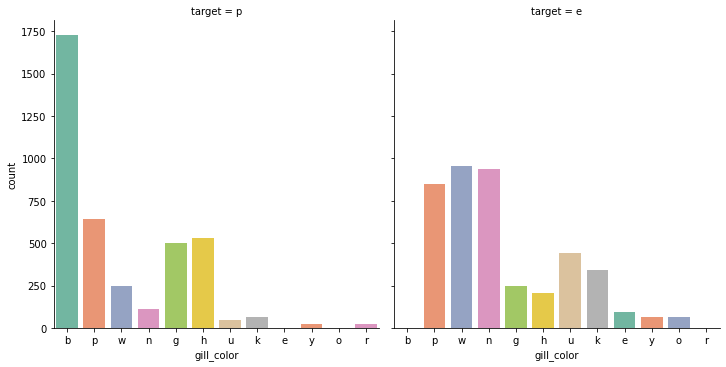

In [7]:
sns.catplot(x= 'gill_color', col = 'target', kind = 'count', order = mushroom_data['gill_color'].value_counts().index , data = mushroom_data, palette = 'Set2');

In [8]:
mushroom_data.describe()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**I will select features that has high variation for my model**

In [9]:
selected_features = ['cap_shape','cap_color','odor','gill_color','stalk_color_above_ring','stalk_color_below_ring','spore_print_color','population','habitat']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

In [11]:
x = mushroom_data[selected_features]
x = pd.get_dummies(x)
y = mushroom_data.target
le = LabelEncoder()

y = le.fit_transform(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [13]:
x_train.head()

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,stalk_color_above_ring_b,stalk_color_above_ring_c,stalk_color_above_ring_e,stalk_color_above_ring_g,stalk_color_above_ring_n,stalk_color_above_ring_o,stalk_color_above_ring_p,stalk_color_above_ring_w,stalk_color_above_ring_y,stalk_color_below_ring_b,stalk_color_below_ring_c,stalk_color_below_ring_e,stalk_color_below_ring_g,stalk_color_below_ring_n,stalk_color_below_ring_o,stalk_color_below_ring_p,stalk_color_below_ring_w,stalk_color_below_ring_y,spore_print_color_b,spore_print_color_h,spore_print_color_k,spore_print_color_n,spore_print_color_o,spore_print_color_r,spore_print_color_u,spore_print_color_w,spore_print_color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4519,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5469,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1904,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5384,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [14]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

**Baseline Model**

In [15]:
import numpy as np
# create baseline model 
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = np.mean(y_train)  # what value to predict?

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds

0       0.480478
1       0.480478
2       0.480478
3       0.480478
4       0.480478
          ...   
2433    0.480478
2434    0.480478
2435    0.480478
2436    0.480478
2437    0.480478
Length: 2438, dtype: float64

In [16]:
#accuracy_score(y_test, baseline_preds)

#error: classification metrics can't handle a mix of binary and contnuous targets

In [17]:
baseline_value = pd.Series(y_train).value_counts().index[0]

baseline_preds = baseline_model(n_predictions, baseline_value)
accuracy_score(y_test, baseline_preds)

0.5143560295324036

**Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pred = model.predict(x_test)

In [21]:
accuracy_score(y_test, pred)

0.9975389663658737

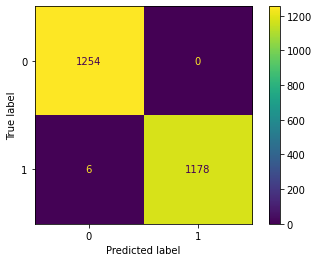

In [22]:
plot_confusion_matrix(model, x_test, y_test, values_format='');

**Baseline accuracy is very low 53%, logistic regression accuracy is 99.8%**